# UNIVERSITY DATA ANALYSIS PROJECT
This notebook is an end to end project about Hourly Energy Consumption

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sb
from sklearn.linear_model  import LinearRegression
from sklearn.ensemble      import RandomForestRegressor
import glob
%matplotlib inline 

# DATA
this data is a 10 years of hourly energy consumption data from PJM in Megawatts wich we can find it in kaggle in this link https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption# 

In [2]:
glob.glob("data/*hourly.csv")

['data\\AEP_hourly.csv',
 'data\\COMED_hourly.csv',
 'data\\DAYTON_hourly.csv',
 'data\\DEOK_hourly.csv',
 'data\\DOM_hourly.csv',
 'data\\DUQ_hourly.csv',
 'data\\EKPC_hourly.csv',
 'data\\FE_hourly.csv',
 'data\\NI_hourly.csv',
 'data\\PJME_hourly.csv',
 'data\\PJMW_hourly.csv',
 'data\\PJM_Load_hourly.csv']

In [3]:
aep = pd.read_csv( 'data/AEP_hourly.csv')
comed = pd.read_csv( 'data/COMED_hourly.csv')
dayton = pd.read_csv( 'data/DAYTON_hourly.csv')
deok = pd.read_csv('data/DEOK_hourly.csv')
dom = pd.read_csv( 'data/DOM_hourly.csv')
duq = pd.read_csv( 'data/DUQ_hourly.csv')
ekpc = pd.read_csv( 'data/EKPC_hourly.csv')
fe = pd.read_csv( 'data/FE_hourly.csv')
ni = pd.read_csv( 'data/NI_hourly.csv')
pjm = pd.read_csv( 'data/PJM_Load_hourly.csv')
pjme = pd.read_csv( 'data/PJME_hourly.csv')
pjmw = pd.read_csv( 'data/PJMW_hourly.csv')

In [4]:
aep['electric_company'] = 'AEP'
comed['electric_company'] = 'COMED'
dayton['electric_company'] = 'DAYTON'
deok['electric_company'] = 'DEOK'
dom['electric_company'] = 'DOM'
duq['electric_company'] = 'DUQ'
ekpc['electric_company'] = 'EKPC'
fe['electric_company'] = 'FE'
ni['electric_company'] = 'NI'
pjm['electric_company'] = 'PJM'
pjme['electric_company'] = 'PJME'
pjmw['electric_company'] = 'PJMW'

In [5]:
aep = aep.rename( columns={'AEP_MW': 'energyconsumption'} )
comed = comed.rename( columns={'COMED_MW': 'energyconsumption'} )
dayton = dayton.rename( columns={'DAYTON_MW': 'energyconsumption'} )
deok = deok.rename( columns={'DEOK_MW': 'energyconsumption'} )
dom = dom.rename( columns={'DOM_MW': 'energyconsumption'} )
duq = duq.rename( columns={'DUQ_MW': 'energyconsumption'} )
ekpc = ekpc.rename( columns={'EKPC_MW': 'energyconsumption'} )
fe = fe.rename( columns={'FE_MW': 'energyconsumption'} )
ni = ni.rename( columns={'NI_MW': 'energyconsumption'} )
pjm = pjm.rename( columns={'PJM_Load_MW': 'energyconsumption'} )
pjme = pjme.rename( columns={'PJME_MW': 'energyconsumption'} )
pjmw = pjmw.rename( columns={'PJMW_MW': 'energyconsumption'} )

# concatenation
here we gonna concatenate all of our csv files into one file 


In [6]:
total= pd.concat([aep,comed,dayton,deok,dom,duq,ekpc,fe,ni,pjm,pjme,pjmw])


In [7]:
total.shape


(1090167, 3)

# Filtring our data
in this section we gonna remove all null or nan or duplicates elemtents

In [8]:
total.drop_duplicates()

,Datetime,energyconsumption,electric_company
0,2004-12-31 01:00:00,13478.0,AEP
1,2004-12-31 02:00:00,12865.0,AEP
2,2004-12-31 03:00:00,12577.0,AEP
3,2004-12-31 04:00:00,12517.0,AEP
4,2004-12-31 05:00:00,12670.0,AEP
...,...,...,...
143201,2018-01-01 20:00:00,8401.0,PJMW
143202,2018-01-01 21:00:00,8373.0,PJMW
143203,2018-01-01 22:00:00,8238.0,PJMW
143204,2018-01-01 23:00:00,7958.0,PJMW


In [9]:
total.isna().sum()

Datetime             0
energyconsumption    0
electric_company     0
dtype: int64

In [10]:
total.columns


Index(['Datetime', 'energyconsumption', 'electric_company'], dtype='object')

In [11]:
total

,Datetime,energyconsumption,electric_company
0,2004-12-31 01:00:00,13478.0,AEP
1,2004-12-31 02:00:00,12865.0,AEP
2,2004-12-31 03:00:00,12577.0,AEP
3,2004-12-31 04:00:00,12517.0,AEP
4,2004-12-31 05:00:00,12670.0,AEP
...,...,...,...
143201,2018-01-01 20:00:00,8401.0,PJMW
143202,2018-01-01 21:00:00,8373.0,PJMW
143203,2018-01-01 22:00:00,8238.0,PJMW
143204,2018-01-01 23:00:00,7958.0,PJMW


# Basic informations of our data

In [12]:
total.describe(include = 'all')


,Datetime,energyconsumption,electric_company
count,1090167,1.090167e+06,1090167
unique,178258,NaN,12
top,2016-11-06 02:00:00,NaN,PJME
freq,20,NaN,145366
mean,NaN,1.120959e+04,NaN
std,NaN,1.053440e+04,NaN
min,NaN,0.000000e+00,NaN
25%,NaN,2.455000e+03,NaN
50%,NaN,8.217000e+03,NaN
75%,NaN,1.466500e+04,NaN


In [13]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090167 entries, 0 to 143205
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Datetime           1090167 non-null  object 
 1   energyconsumption  1090167 non-null  float64
 2   electric_company   1090167 non-null  object 
dtypes: float64(1), object(2)
memory usage: 33.3+ MB


In [14]:
newcopy=total.copy()

In [15]:
newcopy

,Datetime,energyconsumption,electric_company
0,2004-12-31 01:00:00,13478.0,AEP
1,2004-12-31 02:00:00,12865.0,AEP
2,2004-12-31 03:00:00,12577.0,AEP
3,2004-12-31 04:00:00,12517.0,AEP
4,2004-12-31 05:00:00,12670.0,AEP
...,...,...,...
143201,2018-01-01 20:00:00,8401.0,PJMW
143202,2018-01-01 21:00:00,8373.0,PJMW
143203,2018-01-01 22:00:00,8238.0,PJMW
143204,2018-01-01 23:00:00,7958.0,PJMW


# Converting our data
here we gonna convert the datetime into numerical values

In [16]:
newcopy['Datetime'] = pd.to_datetime(newcopy['Datetime'])

In [17]:
newcopy["Month"] = newcopy["Datetime"].dt.month
newcopy["Year"] = newcopy["Datetime"].dt.year
newcopy["Date"] = newcopy["Datetime"].dt.date
newcopy["Time"] = newcopy["Datetime"].dt.time
newcopy['hour'] = newcopy['Datetime'].dt.hour
newcopy["Week"] = newcopy["Datetime"].dt.week
newcopy["Day"] = newcopy["Datetime"].dt.day

C:\Users\DELL\AppData\Local\Temp\ipykernel_13900\1151875645.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  newcopy["Week"] = newcopy["Datetime"].dt.week


In [18]:
newcopy

,Datetime,energyconsumption,electric_company,Month,Year,Date,Time,hour,Week,Day
0,2004-12-31 01:00:00,13478.0,AEP,12,2004,2004-12-31,01:00:00,1,53,31
1,2004-12-31 02:00:00,12865.0,AEP,12,2004,2004-12-31,02:00:00,2,53,31
2,2004-12-31 03:00:00,12577.0,AEP,12,2004,2004-12-31,03:00:00,3,53,31
3,2004-12-31 04:00:00,12517.0,AEP,12,2004,2004-12-31,04:00:00,4,53,31
4,2004-12-31 05:00:00,12670.0,AEP,12,2004,2004-12-31,05:00:00,5,53,31
...,...,...,...,...,...,...,...,...,...,...
143201,2018-01-01 20:00:00,8401.0,PJMW,1,2018,2018-01-01,20:00:00,20,1,1
143202,2018-01-01 21:00:00,8373.0,PJMW,1,2018,2018-01-01,21:00:00,21,1,1
143203,2018-01-01 22:00:00,8238.0,PJMW,1,2018,2018-01-01,22:00:00,22,1,1
143204,2018-01-01 23:00:00,7958.0,PJMW,1,2018,2018-01-01,23:00:00,23,1,1


In [19]:
newcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090167 entries, 0 to 143205
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Datetime           1090167 non-null  datetime64[ns]
 1   energyconsumption  1090167 non-null  float64       
 2   electric_company   1090167 non-null  object        
 3   Month              1090167 non-null  int64         
 4   Year               1090167 non-null  int64         
 5   Date               1090167 non-null  object        
 6   Time               1090167 non-null  object        
 7   hour               1090167 non-null  int64         
 8   Week               1090167 non-null  int64         
 9   Day                1090167 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 91.5+ MB


In [20]:
x=newcopy['energyconsumption']
y=newcopy['Year']


as we can see in here PJME and PJMW are the more companies that consumes energy in this years

PJME      145366
PJMW      143206
DAYTON    121275
AEP       121273
DUQ       119068
DOM       116189
COMED      66497
FE         62874
NI         58450
DEOK       57739
EKPC       45334
PJM        32896
Name: electric_company, dtype: int64

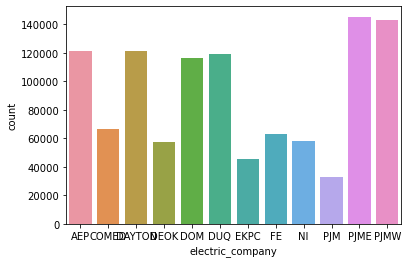

In [21]:
sb.countplot(x="electric_company", data=newcopy)
newcopy.loc[:,'electric_company'].value_counts()

# the energy consumption is high during the working time and after it, but its lower during the night

<AxesSubplot:xlabel='hour', ylabel='energyconsumption'>

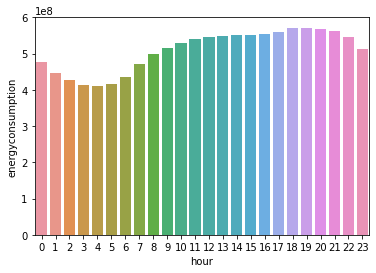

In [22]:
aux1 = newcopy[['hour', 'energyconsumption']].groupby( 'hour' ).sum().reset_index()
sb.barplot( x='hour', y='energyconsumption', data=aux1)

# the energy consumption is high during the summer and the winter

<AxesSubplot:xlabel='Month', ylabel='energyconsumption'>

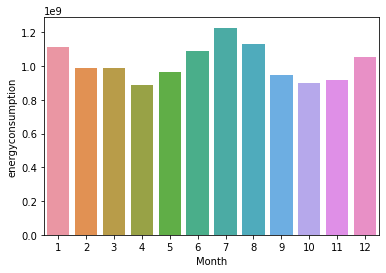

In [23]:
aux1 = newcopy[['Month', 'energyconsumption']].groupby( 'Month' ).sum().reset_index()
sb.barplot( x='Month', y='energyconsumption', data=aux1)

In [24]:
newcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090167 entries, 0 to 143205
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Datetime           1090167 non-null  datetime64[ns]
 1   energyconsumption  1090167 non-null  float64       
 2   electric_company   1090167 non-null  object        
 3   Month              1090167 non-null  int64         
 4   Year               1090167 non-null  int64         
 5   Date               1090167 non-null  object        
 6   Time               1090167 non-null  object        
 7   hour               1090167 non-null  int64         
 8   Week               1090167 non-null  int64         
 9   Day                1090167 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 91.5+ MB


In [25]:
newcopy_1=newcopy.copy()

In [26]:
newcopy_1.drop(["Datetime","Date","Time"],axis=1,inplace=True)

In [27]:
newcopy_1.dtypes

energyconsumption    float64
electric_company      object
Month                  int64
Year                   int64
hour                   int64
Week                   int64
Day                    int64
dtype: object

In [28]:
newcopy_1["electric_company"].unique()

array(['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'EKPC', 'FE', 'NI',
       'PJM', 'PJME', 'PJMW'], dtype=object)

# we gonna encode our data 

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
newcopy_1["electric_company"]=labelencoder.fit_transform(newcopy_1['electric_company'])

In [30]:
newcopy_1

,energyconsumption,electric_company,Month,Year,hour,Week,Day
0,13478.0,0,12,2004,1,53,31
1,12865.0,0,12,2004,2,53,31
2,12577.0,0,12,2004,3,53,31
3,12517.0,0,12,2004,4,53,31
4,12670.0,0,12,2004,5,53,31
...,...,...,...,...,...,...,...
143201,8401.0,11,1,2018,20,1,1
143202,8373.0,11,1,2018,21,1,1
143203,8238.0,11,1,2018,22,1,1
143204,7958.0,11,1,2018,23,1,1


In [31]:
newcopy_1.dtypes

energyconsumption    float64
electric_company       int32
Month                  int64
Year                   int64
hour                   int64
Week                   int64
Day                    int64
dtype: object

# Spliting our data for training and test

In [32]:
features=newcopy_1.drop("energyconsumption",axis=1)
label=newcopy_1["energyconsumption"]
features

,electric_company,Month,Year,hour,Week,Day
0,0,12,2004,1,53,31
1,0,12,2004,2,53,31
2,0,12,2004,3,53,31
3,0,12,2004,4,53,31
4,0,12,2004,5,53,31
...,...,...,...,...,...,...
143201,11,1,2018,20,1,1
143202,11,1,2018,21,1,1
143203,11,1,2018,22,1,1
143204,11,1,2018,23,1,1


In [33]:
label

0         13478.0
1         12865.0
2         12577.0
3         12517.0
4         12670.0
           ...   
143201     8401.0
143202     8373.0
143203     8238.0
143204     7958.0
143205     7691.0
Name: energyconsumption, Length: 1090167, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(features,label,test_size=0.2)

# Modeling
here we gonna create a model then we gonna train it 

In [35]:
from sklearn.ensemble import RandomForestRegressor
moel= RandomForestRegressor(n_jobs= -1)

In [36]:
moel.fit(X_train,Y_train)

RandomForestRegressor(n_jobs=-1)

In [37]:
moel.score(X_test,Y_test)

0.9956795476036117

In [38]:
label.dtype

dtype('float64')

# DATA normalization 
we gonna reduce our data values to be between o and 1

In [39]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
normalized_arr = preprocessing.normalize(features)
feature_scaled = min_max_scaler.fit_transform(features)
normalized_features= pd.DataFrame(feature_scaled)
normalized_features

,0,1,2,3,4,5
0,0.0,1.0,0.3,0.043478,1.0,1.000000
1,0.0,1.0,0.3,0.086957,1.0,1.000000
2,0.0,1.0,0.3,0.130435,1.0,1.000000
3,0.0,1.0,0.3,0.173913,1.0,1.000000
4,0.0,1.0,0.3,0.217391,1.0,1.000000
...,...,...,...,...,...,...
1090162,1.0,0.0,1.0,0.869565,0.0,0.000000
1090163,1.0,0.0,1.0,0.913043,0.0,0.000000
1090164,1.0,0.0,1.0,0.956522,0.0,0.000000
1090165,1.0,0.0,1.0,1.000000,0.0,0.000000


In [40]:
label=label.values.reshape(-1, 1)

In [60]:
from sklearn import preprocessing
normalized_arr = preprocessing.normalize(newcopy_1)
label_scaled = min_max_scaler.fit_transform(newcopy_1)
normalized_newcopy_1= pd.DataFrame(label_scaled)

In [62]:
normalized_newcopy_1.shape

(1090167, 7)

In [ ]:
from sklearn import preprocessing
normalized_arr = preprocessing.normalize(label)
label_scaled = min_max_scaler.fit_transform(label)
normalized_label= pd.DataFrame(label_scaled)

In [42]:
normalized_label

,0
0,0.217356
1,0.207470
2,0.202825
3,0.201858
4,0.204325
...,...
1090162,0.135480
1090163,0.135029
1090164,0.132852
1090165,0.128336


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(normalized_features,normalized_label,test_size=0.2)

In [44]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(n_jobs= -1)

In [45]:
Y_train=Y_train.values.ravel()
model1.fit(X_train,Y_train)

RandomForestRegressor(n_jobs=-1)

In [46]:
Y_test=Y_test.values.ravel()
model1.score(X_test,Y_test)

0.9956941523683078

In [47]:
from sklearn.linear_model  import LinearRegression
model2=LinearRegression(n_jobs= -1)

In [48]:
model2.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [49]:
model2.score(X_test,Y_test)

0.1542512838082708

from sklearn.model_selection import cross_val_score
cross_val_score(model1,X_train,Y_train,cv=8,scoring=None)

cross_val_score(model2,X_train,Y_train,cv=14,scoring=None)

In [50]:
import tensorflow as tf

In [51]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=5,
                          strides=1, padding='causal',
                          activation='relu',
                          input_shape=[None, 1]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 400)
])

In [52]:
model3.compile(loss='mse', optimizer='adam')


In [54]:
model3.fit(X_train,Y_train,epochs =10)

Epoch 1/10
27255/27255 [==============================] - 390s 14ms/step - loss: 0.0330
Epoch 2/10
27255/27255 [==============================] - 627s 23ms/step - loss: 0.0321
Epoch 3/10
27255/27255 [==============================] - 729s 27ms/step - loss: 0.0322
Epoch 4/10
27255/27255 [==============================] - 860s 32ms/step - loss: 0.0323
Epoch 5/10
27255/27255 [==============================] - 847s 31ms/step - loss: 0.0321
Epoch 6/10
27255/27255 [==============================] - 871s 32ms/step - loss: 0.0321
Epoch 7/10
27255/27255 [==============================] - 893s 33ms/step - loss: 0.0323
Epoch 8/10
27255/27255 [==============================] - 927s 34ms/step - loss: 0.0321
Epoch 9/10
27255/27255 [==============================] - 960s 35ms/step - loss: 0.0322
Epoch 10/10
27255/27255 [==============================] - 925s 34ms/step - loss: 0.0322


In [66]:
normalized_newcopy_1=normalized_newcopy_1.iloc[:, 1:2].values

In [55]:
predicted= model3.predict(X_test)

6814/6814 [==============================] - 131s 19ms/step


In [65]:
predicted

array([[[0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981]],

       [[0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981]],

       [[0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981]],

       ...,

       [[0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981]],

       [[0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981]],

       [[0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981],
        [0.0770981]]], dtype=float32)

ValueError: x and y can be no greater than 2D, but have shapes (218034,) and (218034, 6, 1)

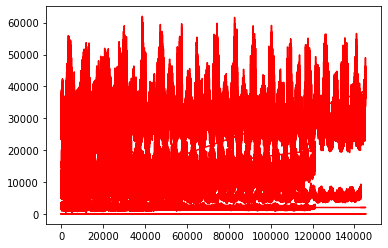

In [70]:
plt.plot(newcopy_1, color = 'red', label = 'Real ')
plt.plot(predicted, color = 'blue', label = 'Predicted ')
plt.title('energy')
plt.xlabel('Time')
plt.ylabel('energy ')
plt.legend()